# 계량경제학 1주차 수업 
-------------------------
계량경제학의 1주차 수업을 시작합니다. 
처음 오신분들은 파이썬의 기초 문법을 알고 오시는것으로 알고 현재 수업은 진행됩니다. 현재 모듈은 해결적과정 2에 해당합니다. 

목차는 readme문서를 참고해주시기 바랍니다. 



기초적인 통계 학 개념부터 구현해보도록 합시다. 이 분야는 한단계씩 쌓아 올리는 부분과, 천천히 개념에 대한 이해를 깊게 가져가는 두개의 적절한 조화가 필요합니다. 

## 1. 기초 통계학 개념


In [36]:
import json
import pandas as pd 
from dotenv import load_dotenv
import os
load_dotenv()
API_KEY = os.environ.get("API_KEY")

In [37]:
import requests

url = "https://yh-finance.p.rapidapi.com/stock/get-fundamentals"

querystring = {"symbol":"AMRN","region":"US","lang":"en-US","modules":"assetProfile,summaryProfile,fundProfile"}

headers = {
	"x-rapidapi-key": API_KEY,
	"x-rapidapi-host": "yh-finance.p.rapidapi.com"
}

response = requests.get(url, headers=headers, params=querystring)

print(response.json())

{'quoteSummary': {'result': [{'assetProfile': {'address1': 'Iconic Offices, The Greenway', 'address2': 'Block C Ardilaun Court St Stephens Green', 'city': 'Dublin', 'zip': '112-114', 'country': 'Ireland', 'phone': '353 0 166 99020', 'website': 'https://www.amarincorp.com', 'industry': 'Drug Manufacturers - General', 'industryKey': 'drug-manufacturers-general', 'industryDisp': 'Drug Manufacturers - General', 'sector': 'Healthcare', 'sectorKey': 'healthcare', 'sectorDisp': 'Healthcare', 'longBusinessSummary': 'Amarin Corporation plc, a pharmaceutical company, engages in the development and commercialization of therapeutics for the treatment of cardiovascular diseases in the United States, European countries, Canada, Lebanon, and the United Arab Emirates. The company offers VASCEPA, a prescription-only omega-3 fatty acid product, used as an adjunct to diet for reducing triglyceride levels in adult patients with severe hypertriglyceridemia. It sells its products principally to wholesalers 

In [38]:
data = response.json()

In [39]:
df = pd.json_normalize(data, record_path=['quoteSummary','result'])

In [40]:
df

,assetProfile.address1,assetProfile.address2,assetProfile.city,assetProfile.zip,assetProfile.country,assetProfile.phone,assetProfile.website,assetProfile.industry,assetProfile.industryKey,assetProfile.industryDisp,...,summaryProfile.industryKey,summaryProfile.industryDisp,summaryProfile.sector,summaryProfile.sectorKey,summaryProfile.sectorDisp,summaryProfile.longBusinessSummary,summaryProfile.fullTimeEmployees,summaryProfile.companyOfficers,summaryProfile.irWebsite,summaryProfile.maxAge
0,"Iconic Offices, The Greenway",Block C Ardilaun Court St Stephens Green,Dublin,112-114,Ireland,353 0 166 99020,https://www.amarincorp.com,Drug Manufacturers - General,drug-manufacturers-general,Drug Manufacturers - General,...,drug-manufacturers-general,Drug Manufacturers - General,Healthcare,healthcare,Healthcare,"Amarin Corporation plc, a pharmaceutical compa...",275,[],http://investor.amarincorp.com/,86400


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 37 columns):
 #   Column                                  Non-Null Count  Dtype 
---  ------                                  --------------  ----- 
 0   assetProfile.address1                   1 non-null      object
 1   assetProfile.address2                   1 non-null      object
 2   assetProfile.city                       1 non-null      object
 3   assetProfile.zip                        1 non-null      object
 4   assetProfile.country                    1 non-null      object
 5   assetProfile.phone                      1 non-null      object
 6   assetProfile.website                    1 non-null      object
 7   assetProfile.industry                   1 non-null      object
 8   assetProfile.industryKey                1 non-null      object
 9   assetProfile.industryDisp               1 non-null      object
 10  assetProfile.sector                     1 non-null      object
 11  assetProfi

In [42]:
df.describe()

,assetProfile.fullTimeEmployees,assetProfile.compensationAsOfEpochDate,assetProfile.maxAge,summaryProfile.fullTimeEmployees,summaryProfile.maxAge
count,1.0,1.000000e+00,1.0,1.0,1.0
mean,275.0,1.703981e+09,86400.0,275.0,86400.0
std,NaN,NaN,NaN,NaN,NaN
min,275.0,1.703981e+09,86400.0,275.0,86400.0
25%,275.0,1.703981e+09,86400.0,275.0,86400.0
50%,275.0,1.703981e+09,86400.0,275.0,86400.0
75%,275.0,1.703981e+09,86400.0,275.0,86400.0
max,275.0,1.703981e+09,86400.0,275.0,86400.0


In [43]:
df.head()

,assetProfile.address1,assetProfile.address2,assetProfile.city,assetProfile.zip,assetProfile.country,assetProfile.phone,assetProfile.website,assetProfile.industry,assetProfile.industryKey,assetProfile.industryDisp,...,summaryProfile.industryKey,summaryProfile.industryDisp,summaryProfile.sector,summaryProfile.sectorKey,summaryProfile.sectorDisp,summaryProfile.longBusinessSummary,summaryProfile.fullTimeEmployees,summaryProfile.companyOfficers,summaryProfile.irWebsite,summaryProfile.maxAge
0,"Iconic Offices, The Greenway",Block C Ardilaun Court St Stephens Green,Dublin,112-114,Ireland,353 0 166 99020,https://www.amarincorp.com,Drug Manufacturers - General,drug-manufacturers-general,Drug Manufacturers - General,...,drug-manufacturers-general,Drug Manufacturers - General,Healthcare,healthcare,Healthcare,"Amarin Corporation plc, a pharmaceutical compa...",275,[],http://investor.amarincorp.com/,86400


In [44]:
#행열 변환
df=df.transpose()
df.head()

,0
assetProfile.address1,"Iconic Offices, The Greenway"
assetProfile.address2,Block C Ardilaun Court St Stephens Green
assetProfile.city,Dublin
assetProfile.zip,112-114
assetProfile.country,Ireland


## 1. 통계학의 개념과 용어 정리
-----
통계학이란 불확실성을 다루는 학문이다.\
동전 던지기에서 '숫자'가 나오면 100원을 받고, '그림'이 나오면 100원을 잃는 게임을 한다고 하자.
\

|단어| 정의                   |
|---|--------------------|
|임의실험(random experiment)| 동전을 던지는 행위           |
|표본공간(sample space)| '그림'과 '숫자'라는 경우로 이루어진 집합 |
\
즉, 임의실험이란 그 결과가 미리 알려져 있지 않은 어떤 과정(any process whose outcome is not known in advance with certainty)이고, 표본공간은 임의실험에서 가능한 모든 경우의 집합을 의미한다. 위의 예에서처럼 표본공간을 반드시 숫자로 표시할 필요는 없다. 또, 표본공간은 어떤 실험을 하는가에 따라 달라진다.

### 1.1 확률변수
------------
확률변수는 그 값이 우연히 결정되는 변수이다. 게임에서 벌 수 있는 돈을 x라고 하면, 게임이 끝나고 x의 값이 얼마일지 모르기 때문에 x는 확률변수이다. 확률변수는 반드시 숫자로 표시한다. 그런 점에서 확률변수는 각각의 가능한 실험결과에 특정한 숫자를 부여하여 정의된 변수(a real-valued function defined over a sample space)라고도 정의한다.

확률변수는 값의 특징에 따라 크게 이산형과 연속형으로 나뉜다.

* 이산형 확률변수(Discrete Random Variable): 값이 특정 개수만큼 분리되어 있는 확률변수.
	* 예) 주사위 눈(1,2,3,4,5,6)
* 연속형 확률변수(Continuous Random Variable): 값이 연속적으로 나타날 수 있는 확률변수.
    * 예) 사람의 키(170.0cm, 171.0cm, 171.4cm ...)

Dice's number [1 3 5 4 1 3 3 2 6 4]


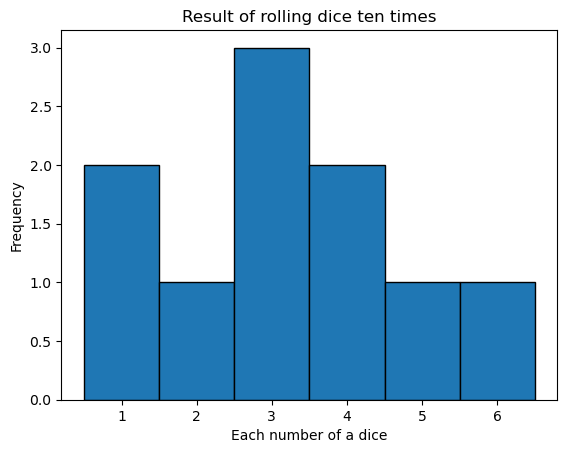

In [45]:
# 이산형 확률변수 예시
import numpy as np
import matplotlib.pyplot as plt

# 주사위를 10번 던지기
n_dice_throws = 10
dice_rolls = np.random.choice(range(1, 7), n_dice_throws)

# 결과 출력
print("Dice's number", dice_rolls)

# 히스토그램으로 나타내기
plt.hist(dice_rolls, bins=np.arange(1, 8) - 0.5, edgecolor='black')
plt.xlabel('Each number of a dice')
plt.ylabel('Frequency')
plt.title('Result of rolling dice ten times')
plt.xticks(range(1, 7))
plt.show()

### 1.2 모집단과 표본
_____
'한양대학교 ERICA 학생들의 고등학교 성적은 어떤 특성을 가지는가?'에 대한 조사를 한다고 하자. 하지만 1.2만명의 고등학교 성적을 모두 조사하는 것은 시간과 비용이 많이 들 것이다. 따라서, 몇명만 추출하여 조사하고자 한다.
이때, 학생들의 추출은 반드시 random해야 한다. 만약 무작위가 아니고 약학대학에서만 학생을 추출한다면 고등학교 성적은 매우 높을 것이고, 이는 모든 한양대학교 학생들의 특성이라고 하기에는 어렵다. 이러한 조사는 random하기 이루어져야 하고, 이렇게 학생들을 추출하는 과정은 하나의 임의실험이다.

|단어| 정의                                           | 예시                  |
|---|----------------------------------------------|-------|
|모집단(population)| 확률변수 x가 취할 수 잇는 모든 값 혹은 대상으로 삼는 대상의 특성 전체    | 한양대생(ERICA) 1.2만명의 고등학교 성적 |
|표본(sample)| 모집단의 부분집합                                    | 1 등급, 1.5 등급, 1.8 등급|

### 1.3 추정량과 추정치
------
'한양대학교 ERICA 학생들의 고등학교 성적이 어떤 특성을 가지는지'를 보는 조사에서 통계학적으로 중요하게 볼 수 있는 특성은 '평균'과 '분산'이다.

|                       실험 시행 전                       |             실험 실행 후              |
|:---------------------------------------------------:|:--------------------------------:|
|                   추정량(estimator)                    |          추정치(estimate)           |
| 모집단의 특성을 알기 위한 공식을 의미하며 <br> 실제 data를 대입하기 전에는 확률변수 | data를 공식에 대입하여 특정하게 나타난 <br> 실현치 |

주사위의 모든 면이 평평하다는 가정 하에 주사위를 10번 던졌을 때 나오는 기대값과 분산의 추정량은 얼마일까?

### 1.4 기대치(기대값) & 분산
-----
기대값(expected value)은 확률변수가 취할 수 있는 가능한 모든 값들의 평균이다.

$$ E(y_i) = \sum_{i} \left[(y_i \cdot Pr(y_i=y) \right] $$

연속형 확률변수 $ X $의 분산 $ Var(X) $는 다음과 같이 계산한다:

$$ E(y_i) = \int_{-\infty}^{\infty} y_i \cdot f(y) \, dy $$

분산(variance)은 확률변수가 취할 수 있는 가능한 모든 값들이 기대값으로부터 퍼진 정도이다. 분포의 크기가 작을 수록 추정한 기대값의 불확실성이 감소한다.

이산형 확률변수 $ X $의 분산 $ Var(X) $는 다음과 같이 계산한다:

$$ Var(X) = \sum_{i} \left[(Y - E(Y))^2 \cdot P(Y)\right] $$

연속형 확률변수 $ X $의 분산 $ Var(X) $는 다음과 같이 계산한다:

$$ Var(X) = \int_{-\infty}^{\infty} (Y - E(Y))^2 f(y) \, dy $$

In [46]:
# 주사위 면의 값과 각 면의 확률
dice_faces = np.array([1, 2, 3, 4, 5, 6])
probabilities = np.full(6, 1/6)  # 각 면의 확률은 균등

# 기대치의 추정량
expected_value = np.sum(dice_faces * probabilities)
print(f"Expected Value (E(X)): {expected_value}")

# 분산의 추정량
variance = np.sum((dice_faces - expected_value)**2 * probabilities)
print(f"Variance (Var(X)): {variance}")

Expected Value (E(X)): 3.5
Variance (Var(X)): 2.9166666666666665


확률변수를 보기 위해 우리는 실제로 주사위 10번을 던져봤다. 이때 추정치는 얼마였을까?

In [47]:
# 기대치 추정치: 주사위 10번 던진 결과의 평균
expected_value_estimate = np.mean(dice_rolls)

# 분산 추정치: 주사위 10번 던진 결과의 분산 
variance_estimate = np.var(dice_rolls, ddof=1)  # ddof=1 makes it an unbiased estimator

print(f"Expected Value Estimate: {expected_value_estimate}")
print(f"Variance Estimate: {variance_estimate}")

Expected Value Estimate: 3.2
Variance Estimate: 2.6222222222222222


### 1.5 최소자승법(Ordinary Least Square)
-----


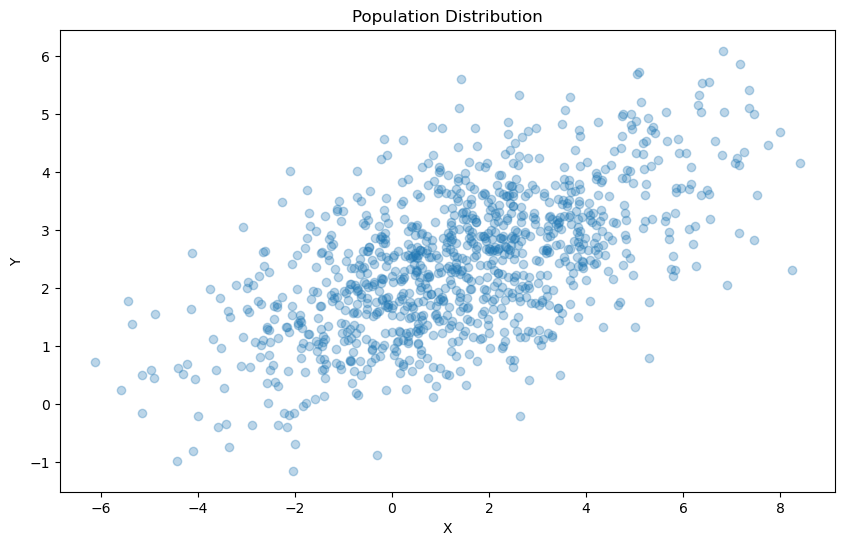

In [48]:
import numpy as np
import matplotlib.pyplot as plt

# 모집단 데이터 생성
np.random.seed(0)
population_size = 1000
X_population = 2.5 * np.random.randn(population_size) + 1.5  # 독립 변수 X
y_population = 2 + 0.3 * X_population + np.random.randn(population_size)  # 종속 변수 Y

# 모집단 산점도 그리기
plt.figure(figsize=(10, 6))
plt.scatter(X_population, y_population, alpha=0.3)
plt.title('Population Distribution')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()


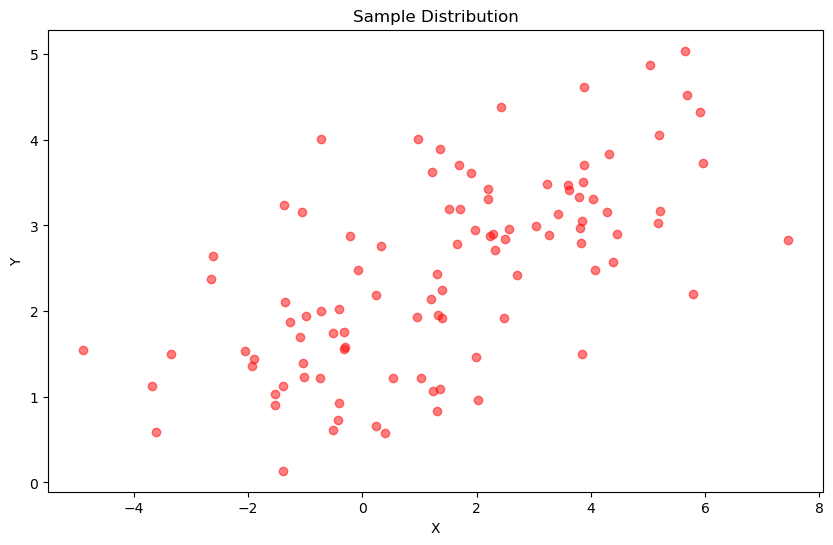

In [49]:
# 표본 데이터 추출
sample_size = 100
sample_indices = np.random.choice(population_size, sample_size, replace=False)
X_sample = X_population[sample_indices]
y_sample = y_population[sample_indices]

# 표본 산점도 그리기
plt.figure(figsize=(10, 6))
plt.scatter(X_sample, y_sample, color='red', alpha=0.5)
plt.title('Sample Distribution')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

추정된 회귀 계수:
절편 (Beta_0): 2.062674188936078
기울기 (Beta_1): 0.27762733774327386


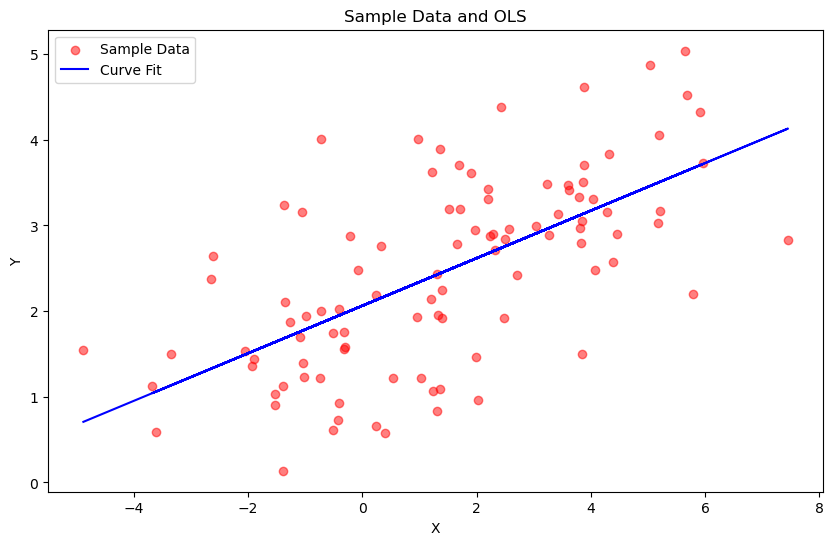

In [50]:
# OLS 추정량 계산
X_sample_with_intercept = np.c_[np.ones(sample_size), X_sample]  # 절편을 위한 열 추가
beta_hat = np.linalg.inv(X_sample_with_intercept.T @ X_sample_with_intercept) @ X_sample_with_intercept.T @ y_sample

# 추정된 회귀 계수
beta_0_hat, beta_1_hat = beta_hat
print("추정된 회귀 계수:")
print("절편 (Beta_0):", beta_0_hat)
print("기울기 (Beta_1):", beta_1_hat)

# 회귀선 그리기
y_pred = beta_0_hat + beta_1_hat * X_sample

plt.figure(figsize=(10, 6))
plt.scatter(X_sample, y_sample, color='red', alpha=0.5, label='Sample Data')
plt.plot(X_sample, y_pred, color='blue', label='Curve Fit')
plt.title('Sample Data and OLS')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

### 1.6 불편추정량
____


Population Mean: 50


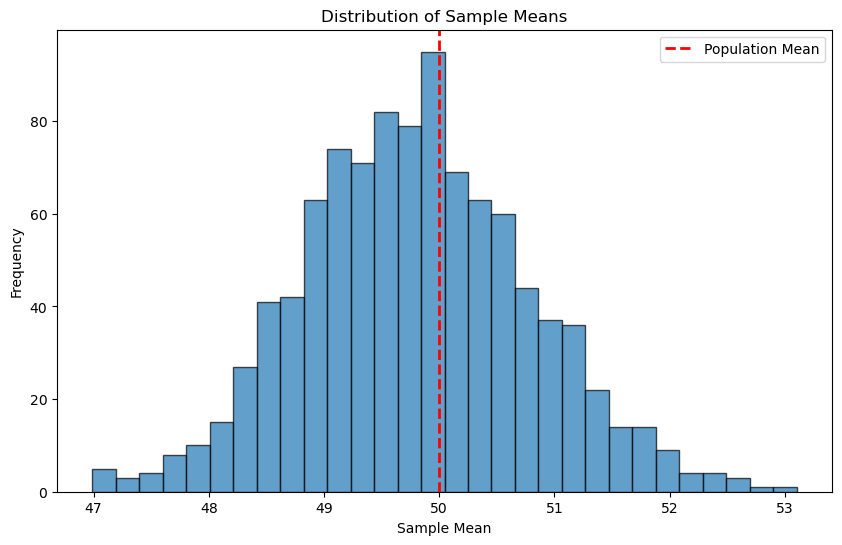

In [51]:
import numpy as np
import matplotlib.pyplot as plt

# 모집단 데이터 생성
np.random.seed(0)
population_mean = 50
population_std = 10
population_size = 10000
population = np.random.normal(population_mean, population_std, population_size)

# 모집단 평균 출력
print("Population Mean:", population_mean)

# 표본 추출 및 평균 계산
sample_size = 100
num_samples = 1000
sample_means = []

for _ in range(num_samples):
    sample = np.random.choice(population, sample_size)
    sample_mean = np.mean(sample)
    sample_means.append(sample_mean)

# 표본 평균의 분포 시각화
plt.figure(figsize=(10, 6))
plt.hist(sample_means, bins=30, edgecolor='k', alpha=0.7)
plt.axvline(population_mean, color='red', linestyle='dashed', linewidth=2, label='Population Mean')
plt.title('Distribution of Sample Means')
plt.xlabel('Sample Mean')
plt.ylabel('Frequency')
plt.legend()
plt.show()

In [52]:
# 표본 분산 계산 (편향된 추정량)
biased_sample_variance = np.var(sample_means, ddof=0)
print("Biased Sample Variance:", biased_sample_variance)

# 수정된 표본 분산 계산 (불편 추정량)
unbiased_sample_variance = np.var(sample_means, ddof=1)
print("Unbiased Sample Variance:", unbiased_sample_variance)

Biased Sample Variance: 0.9817246254596956
Unbiased Sample Variance: 0.9827073327924881
